In [1]:
import os
os.environ["DDE_BACKEND"] = "pytorch"

import deepxde as dde
import numpy as np


Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [12]:
def func(x):
    return np.sin(1/x)


In [13]:
geom = dde.geometry.Interval(-1, 1)


In [14]:
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test=num_test)


In [15]:
activation = 'relu'
initializer = 'Glorot uniform'
net = dde.nn.FNN([1] + [20]*3 + [1], activation, initializer)


In [16]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics = ["l2 relative error"])


Compiling model...
'compile' took 0.000259 s



In [17]:
losshistory, train_state = model.train(iterations=10000)


Training model...

Step      Train loss    Test loss     Test metric   
0         [7.13e-01]    [7.30e-01]    [1.01e+00]    
1000      [1.10e-04]    [1.16e-01]    [4.03e-01]    
2000      [2.86e-06]    [1.16e-01]    [4.03e-01]    
3000      [1.53e-06]    [1.16e-01]    [4.03e-01]    
4000      [1.60e-06]    [1.16e-01]    [4.02e-01]    
5000      [1.53e-06]    [1.15e-01]    [4.02e-01]    
6000      [1.53e-06]    [1.16e-01]    [4.03e-01]    
7000      [4.06e-06]    [1.16e-01]    [4.03e-01]    
8000      [3.13e-05]    [1.16e-01]    [4.02e-01]    
9000      [1.53e-06]    [1.15e-01]    [4.02e-01]    
10000     [1.53e-06]    [1.15e-01]    [4.01e-01]    

Best model at step 10000:
  train loss: 1.53e-06
  test loss: 1.15e-01
  test metric: [4.01e-01]

'train' took 25.331633 s



Saving loss history to c:\Users\Hanne\Documents\Studium\Masters\Semester 1\Scientific Machine Learning\Week 7\loss.dat ...
Saving training data to c:\Users\Hanne\Documents\Studium\Masters\Semester 1\Scientific Machine Learning\Week 7\train.dat ...
Saving test data to c:\Users\Hanne\Documents\Studium\Masters\Semester 1\Scientific Machine Learning\Week 7\test.dat ...


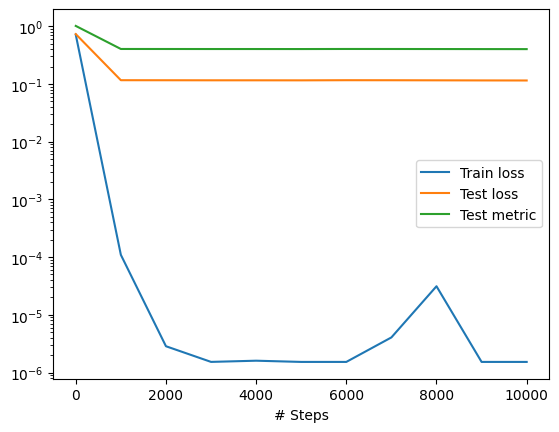

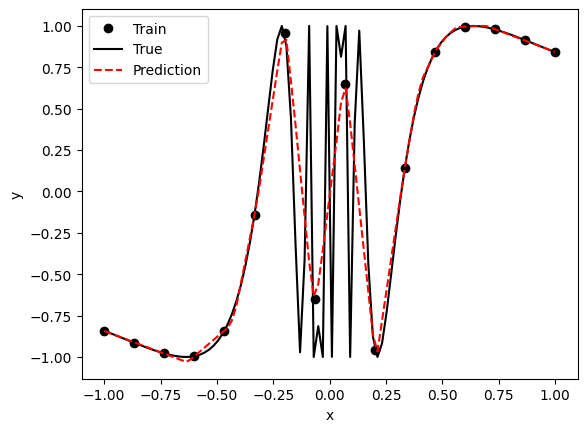

In [18]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)
